## Tutorial: Introducción al clustering (I): algoritmo k-means 

#### Importamos las librerías necesarias

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

#### Cargamos nuestro dataset

In [12]:
# Cargamos el conjunto de datos
df = pd.read_csv ('data/data.csv')

# Mostramos las primeras observaciones
df.head()

,x,y
0,68,183
1,4,36
2,78,186
3,69,194
4,7,154


#### Mostramos un diagrama de dispersión con todos los puntos

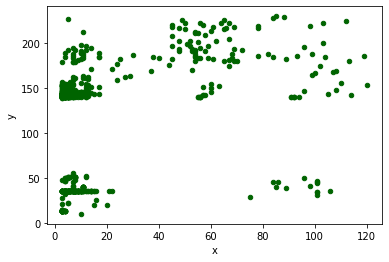

In [13]:
df.plot.scatter(x='x', y='y', c='DarkGreen')
plt.show()

#### Normalizamos los datos

In [14]:
min_max_scaler = MinMaxScaler() 
df = min_max_scaler.fit_transform(df)
df = pd.DataFrame(df) # Convertimos a Dataframe

In [15]:
# Mostramos los datos escalados
df.head(5)

,0,1
0,0.555556,0.786364
1,0.008547,0.118182
2,0.641026,0.800000
3,0.564103,0.836364
4,0.034188,0.654545


#### Aplicamos k-means a nuestro dataset

In [16]:
# Aplicamos k-means a nuestro dataset
km = KMeans(n_clusters=5, init='random', 
            max_iter=200, random_state=0)
y_km = km.fit_predict(df)

In [17]:
y_km[0:10]

array([4, 3, 4, 4, 0, 0, 3, 0, 1, 4], dtype=int32)

#### Mostramos gráfico con los puntos y sus clusters y los centroides

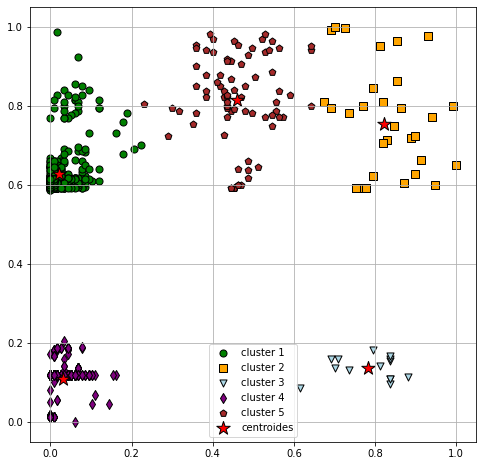

In [18]:
plt.figure(figsize=(8,8))
plt.scatter(df[y_km == 0][0], df[y_km == 0][1], 
            s=50, c='green', marker='o', 
            edgecolor='black', label='cluster 1')
plt.scatter(df[y_km == 1][0], df[y_km == 1][1],  
            s=50, c='orange', marker='s', 
            edgecolor='black', label='cluster 2')
plt.scatter(df[y_km == 2][0], df[y_km == 2][1], 
            s=50, c='lightblue', marker='v', 
            edgecolor='black', label='cluster 3')
plt.scatter(df[y_km == 3][0], df[y_km == 3][1], 
            s=50, c='purple', marker='d', 
            edgecolor='black', label='cluster 4')
plt.scatter(df[y_km == 4][0], df[y_km == 4][1], 
            s=50, c='brown', marker='p', 
            edgecolor='black', label='cluster 5')
plt.scatter(km.cluster_centers_[:, 0], 
            km.cluster_centers_[:, 1], s=200, 
            marker='*', c='red', 
            edgecolor='black', label='centroides')
plt.legend(loc="best")
plt.grid()
plt.show()